<a href="https://colab.research.google.com/github/Valtern/machinelearningsmt5/blob/main/QUIZ1_2341720067_Antonius%20Kaharap%20Kautsar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [180]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [181]:

# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder



In [182]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [183]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [184]:
# Data Size
df.shape

(48842, 15)

In [185]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [186]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


1. I used the isnull().sum() function in order to know how many variable has missing value

2. There are 3 variable that has missing value.

workclass: 963 missing value
occupation: 966 missing value
native-country: 274 missing value

## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [187]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed


df['workclass'] = df['workclass'].fillna('Private')
df['occupation'] = df['occupation'].fillna('Unknown')
df['native-country'] = df['native-country'].fillna('Unknown')

df.isnull().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


1. I impute the 3 variable that has missing value with "Private" and "Unknown" since their datatype is object
2. No, as proven after using the method for checking missing value. There are no longer any missing value

## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [188]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed


cols = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in cols:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)

    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)


df[cols].describe()


,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.590475,188429.787424,625.767331,84.281315,40.373613
std,13.553565,99732.675210,2501.944450,384.647196,11.972384
min,17.000000,27166.000000,0.000000,0.000000,8.000000
25%,28.000000,117550.500000,0.000000,0.000000,40.000000
50%,37.000000,178144.500000,0.000000,0.000000,40.000000
75%,48.000000,237642.000000,0.000000,0.000000,45.000000
max,74.000000,509484.420000,15024.000000,2001.000000,80.000000


I capped all quantitative varible with the lower and upper bound of 1% and 99% to make sure that the data has the lowest ceiling of 1% of all the quantitative data and the highest ceiling of 99% of all data.

Also, I'm pretty confused on how i should replace any inapproriate value with quantitative feature or fix the typos unless you're referring to the qualitative features

# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

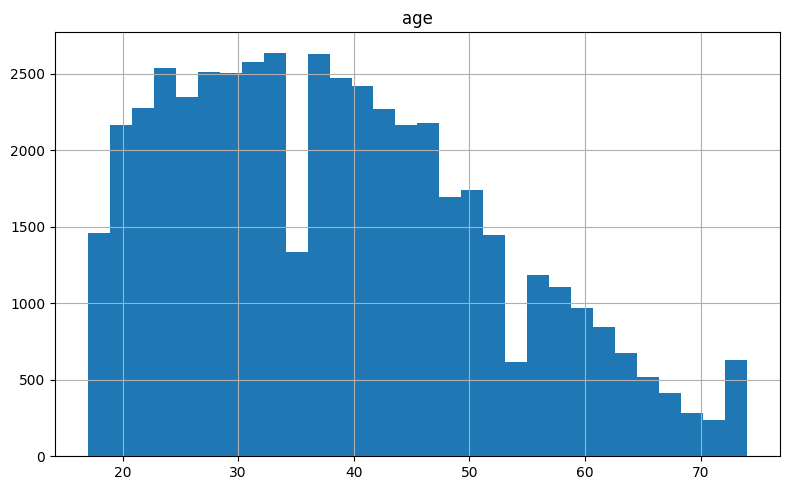

In [189]:
# Answer 1.1 - Histrogram

col_his = ['age']

df[col_his].hist(figsize=(8, 5), bins=30)
plt.tight_layout()
plt.show()

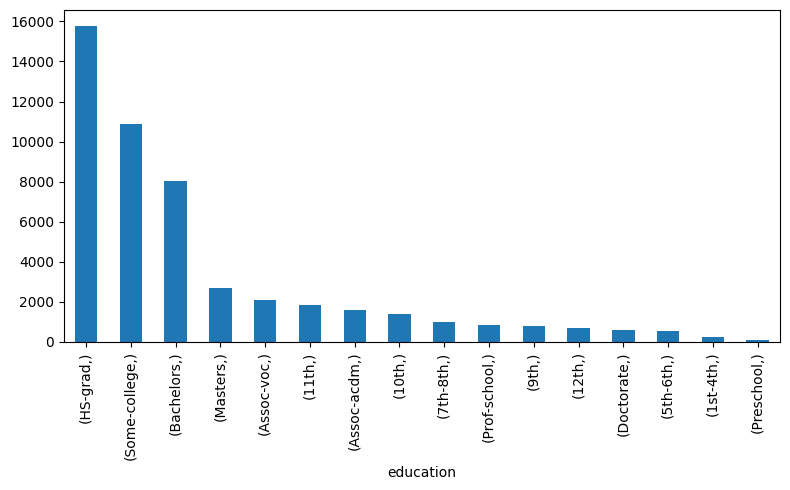

In [190]:
# Answer 1.2 - Barchart
col_his = ['education']

df[col_his].value_counts().plot(kind='bar', figsize=(8, 5))
plt.tight_layout()
plt.show()

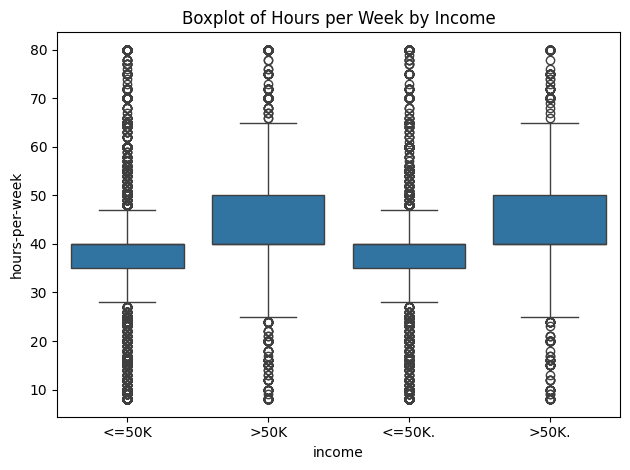

In [191]:
# Answer 1.3 - Boxplot

sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Boxplot of Hours per Week by Income')
plt.tight_layout()
plt.show()

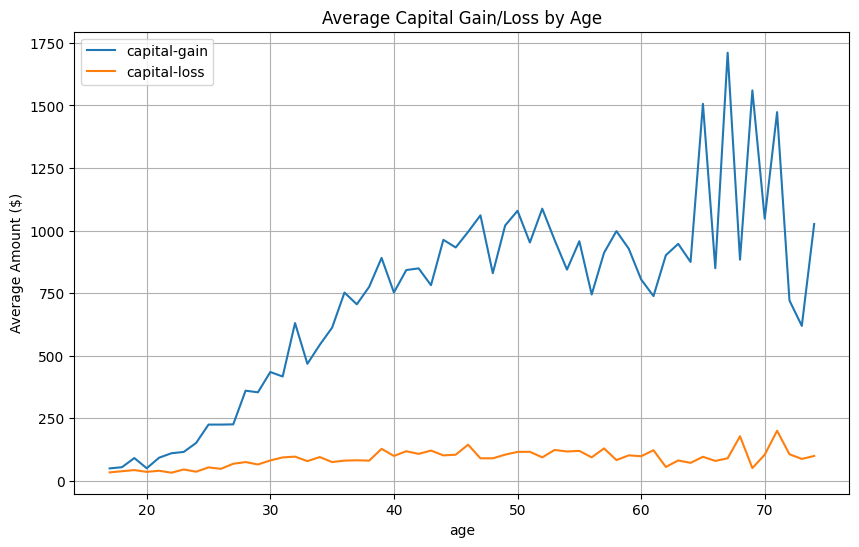

In [192]:
# Answer 1.4 - Lineplot
age_trend = df.groupby('age')[['capital-gain', 'capital-loss']].mean()


age_trend.plot(figsize=(10, 6), grid=True)
plt.title('Average Capital Gain/Loss by Age')
plt.ylabel('Average Amount ($)')
plt.show()

## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [193]:
# Answer with python comment like this -> inline comment

'''
 1. The histogram for 'age' shows a right-skewed distribution. This means that the bulk of the individuals in the dataset are concentrated in the younger to middle-aged range, with a long "tail" of fewer individuals stretching out towards the older ages. \n
 2. I used the impupte method of median, The reason is that the distribution is skewed. the mean is sensitive to skewed data and would be pulled higher by the long tail of older ages, making it a less accurate representation of the center. The median, on the other hand, is robust to outliers and skewed distributions, providing a more reliable measure of the typical age.\n
 3. The '<=50K' income group has 7809 outliers. The '>50K' income group has 510 outliers. Therefore, the '<=50K' category has significantly more outliers in the hours-per-week variable.
'''

'\n 1. The histogram for \'age\' shows a right-skewed distribution. This means that the bulk of the individuals in the dataset are concentrated in the younger to middle-aged range, with a long "tail" of fewer individuals stretching out towards the older ages. \n\n 2. I used the impupte method of median, The reason is that the distribution is skewed. the mean is sensitive to skewed data and would be pulled higher by the long tail of older ages, making it a less accurate representation of the center. The median, on the other hand, is robust to outliers and skewed distributions, providing a more reliable measure of the typical age.\n\n 3. The \'<=50K\' income group has 7809 outliers. The \'>50K\' income group has 510 outliers. Therefore, the \'<=50K\' category has significantly more outliers in the hours-per-week variable.\n'

**Answer with python comment like this -> inline comment**

'''
 1. The histogram for 'age' shows a right-skewed distribution. This means that the bulk of the individuals in the dataset are concentrated in the younger to middle-aged range, with a long "tail" of fewer individuals stretching out towards the older ages. \n
 2. I used the impupte method of median, The reason is that the distribution is skewed. the mean is sensitive to skewed data and would be pulled higher by the long tail of older ages, making it a less accurate representation of the center. The median, on the other hand, is robust to outliers and skewed distributions, providing a more reliable measure of the typical age.\n
 3. The '<=50K' income group has 7809 outliers. The '>50K' income group has 510 outliers. Therefore, the '<=50K' category has significantly more outliers in the hours-per-week variable.
'''

In [194]:
def count_outliers(data_series):
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    return len(outliers)

income_le50k = df[df['income'] == '<=50K']['hours-per-week']
income_gt50k = df[df['income'] == '>50K']['hours-per-week']

outliers_le50k = count_outliers(income_le50k)
outliers_gt50k = count_outliers(income_gt50k)

print(f"Outliers in '<=50K' group: {outliers_le50k}")
print(f"Outliers in '>50K' group: {outliers_gt50k}")

Outliers in '<=50K' group: 7809
Outliers in '>50K' group: 510


# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [195]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])


I have encoded both sex and income

# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

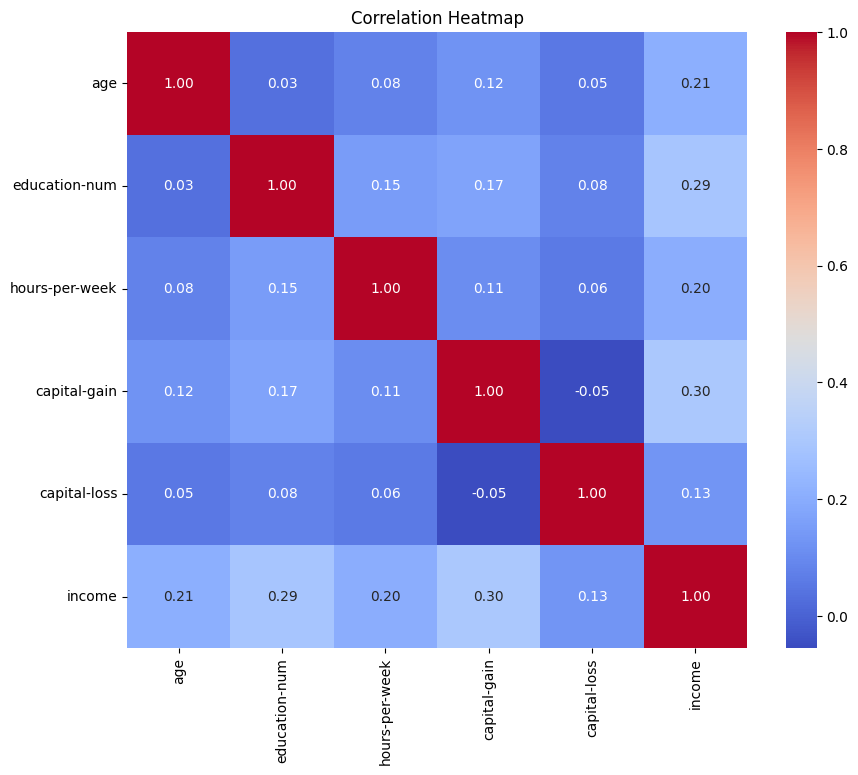

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [196]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed

corr_matrix = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.figure

1. I used the heatmap correlation
2. The heatmap suggests that every variable chosen shows some degree of positive connection with income, though most of these links are fairly modest. Among them, capital gain (0.30) and years of education (0.29) stand out the most, hinting that individuals with greater investment returns and longer educational backgrounds are more likely to earn higher wages. Age and hours worked per week also lean in the same direction, though their influence appears less pronounced. Interestingly, capital loss registers the weakest correlation of the set, barely nudging the income relationship at all.

In [197]:
# Answer task 2 using this cell -> you can use multiple comments style too

# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [198]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


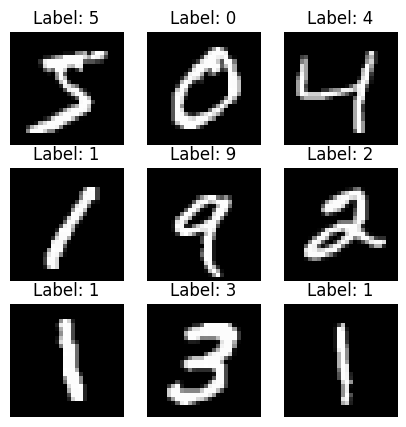

In [199]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

Shape of original test data: (10000, 28, 28)
Shape of upsampled test data: (10000, 32, 32)

Sample of upsampled images:


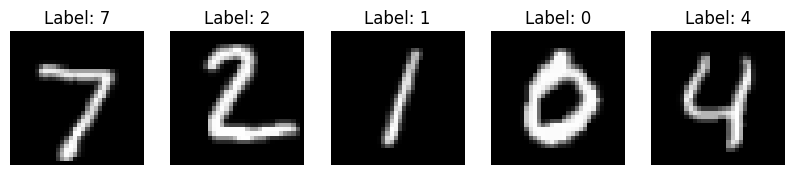

In [200]:
# Answer task 1 using this cell
# You can add another cell after this cell if needed


# 1. Answer
X_test_upsampled = np.zeros((len(X_test), 32, 32))
for i in range(len(X_test)):
    resized_image = cv.resize(X_test[i], (32, 32), interpolation=cv.INTER_LINEAR)
    X_test_upsampled[i] = resized_image

print(f"Shape of original test data: {X_test.shape}")
print(f"Shape of upsampled test data: {X_test_upsampled.shape}")


# 2. Answer
print("\nSample of upsampled images:")
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_upsampled[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

In [201]:
# Answer task 2 using this cell
# You can add another cell after this cell if needed

# Answer for task 2
X_test_normalized = X_test_upsampled / 255.0

print(f"Minimum pixel value after normalization: {X_test_normalized.min()}")
print(f"Maximum pixel value after normalization: {X_test_normalized.max()}")


Minimum pixel value after normalization: 0.0
Maximum pixel value after normalization: 1.0


## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

In [202]:
# Answer task 3 using this cell
# You can add another cell after this cell if needed

# Answer for task 3
X_test_flattened = X_test_normalized.reshape(len(X_test_normalized), -1)

print(f"Shape of original test data: {X_test_normalized.shape}")
print(f"Shape of flattened test data: {X_test_flattened.shape}")

Shape of original test data: (10000, 32, 32)
Shape of flattened test data: (10000, 1024)
